In [547]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy.random as nr
from math import sin
import scipy.stats as ss
%matplotlib inline

In [548]:
#import data
ts = pd.read_csv('CADairyProduction.csv')

In [549]:
#ts.head(20)

In [550]:
#ts.tail()

In [551]:
#add monthly index based
ts.index = pd.date_range(start = '1-1-1995', end = '12-31-2013', freq = 'M')

In [552]:
#check to confirm index applied properly
ts.head()

,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
1995-01-31,1995,Jan,4.370,51.595,2.112,0.9803,1,1,1
1995-02-28,1995,Feb,3.695,56.086,1.932,0.8924,2,4,8
1995-03-31,1995,Mar,4.538,68.453,2.162,0.8924,3,9,27
1995-04-30,1995,Apr,4.280,65.722,2.130,0.8967,4,16,64
1995-05-31,1995,May,4.470,73.730,2.227,0.8967,5,25,125


In [553]:
#change to MilkProd to easily call column
ts['MilkProd'] = ts['Milk.Prod']
ts['MonthCount'] = ts['Month.Count']

Index(['Year', 'Month', 'Cotagecheese.Prod', 'Icecream.Prod', 'Milk.Prod',
       'N.CA.Fat.Price', 'Month.Count', 'monthNumSqred', 'monthNumCubed',
       'MilkProd', 'MonthCount', 'Milk_log'],
      dtype='object')

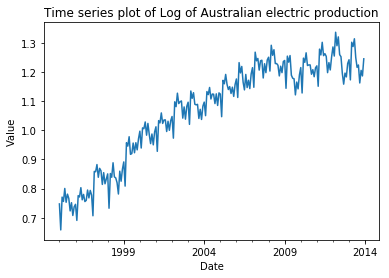

In [554]:
ts['Milk_log'] = np.log(ts.MilkProd)
plot_ts(ts.Milk_log, 'Log of Australian electric production')
ts.columns

In [555]:
# Select the ones you want
ts1 = ts[['MilkProd','Milk_log']]

In [556]:
# del ts1['Icecream.Prod']
# del ts1['Cotagecheese.Prod']
# del ts1['Milk.Prod']
# del ts1['Year']
# del ts1['Month']
# del ts1['N.CA.Fat.Price']
# del ts1['monthNumSqred']
# del ts1['monthNumCubed']
# del ts1['Month.Count']

Text(0.5,0,'Date')

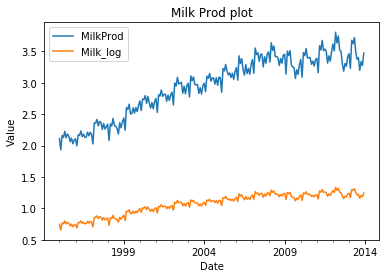

In [557]:
#plot milk prod time series 
ts1.plot()
plt.title('Milk Prod plot')
plt.ylabel('Value')
plt.xlabel('Date')

In [558]:
# from math import pi
# def seasonal_ts(start = '1-1990', end = '1-2015', freq = 'M', slope = 0.02, sd = 1.0, mean = 0):
#     dates = pd.date_range(start = start, end = end, freq = freq)
#     seasonal = milk_ts
#     seasonal = seasonal + ts.normal(loc = mean, scale = sd, size = len(dates))
#     seasonal = seasonal + [2.0*sin(pi*x/6) for x in range(len(dates))] + 5.0
#     return(seasonal)

# seasonal = seasonal_ts()
# plot_ts(seasonal, 'seasonal data')

### STL Decomposition 

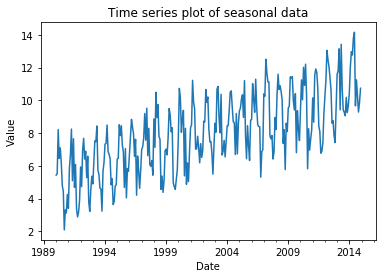

In [559]:
#recreate seasonal_ts using example from lesson
nr.seed(5544)
from math import pi
def seasonal_ts(start = '1-1990', end = '1-2015', freq = 'M', slope = 0.02, sd = 1.0, mean = 0):
    dates = pd.date_range(start = start, end = end, freq = freq)
    seasonal = pd.Series([slope*x for x in range(len(dates))],
                    index = dates)
    seasonal = seasonal + nr.normal(loc = mean, scale = sd, size = len(dates))
    seasonal = seasonal + [2.0*sin(pi*x/6) for x in range(len(dates))] + 5.0
    return(seasonal)

seasonal = seasonal_ts()
plot_ts(seasonal, 'seasonal data')

In [560]:
#recreate decomp_ts using example from lesson
import statsmodels.tsa.seasonal as sts
def decomp_ts(ts, freq = 'M', model = 'additive'):
    res = sts.seasonal_decompose(ts, model = model) #, freq = freq)
    #resplot = res.plot()
    #res.plot()
    return(pd.DataFrame({'resid': res.resid, 
                         'trend': res.trend, 
                         'seasonal': res.seasonal},
                       index = ts.index) )

decomp = decomp_ts(seasonal)
print(decomp[:12])
decomp[-12:]

               resid     trend  seasonal
1990-01-31       NaN       NaN  0.176526
1990-02-28       NaN       NaN  0.736354
1990-03-31       NaN       NaN  1.951446
1990-04-30       NaN       NaN  1.780959
1990-05-31       NaN       NaN  1.628076
1990-06-30       NaN       NaN  1.142755
1990-07-31 -0.017122  4.990888 -0.179054
1990-08-31  0.530561  4.920451 -1.015747
1990-09-30 -1.266179  4.870383 -1.523592
1990-10-31  0.377256  4.880803 -1.954974
1990-11-30  0.017118  4.872056 -1.766961
1990-12-31  0.376213  4.847891 -0.975786


,resid,trend,seasonal
2014-01-31,-0.806781,11.099456,0.176526
2014-02-28,0.115051,11.192865,0.736354
2014-03-31,-0.307412,11.325513,1.951446
2014-04-30,-0.353034,11.338165,1.780959
2014-05-31,0.865197,11.326752,1.628076
2014-06-30,1.618919,11.396875,1.142755
2014-07-31,NaN,NaN,-0.179054
2014-08-31,NaN,NaN,-1.015747
2014-09-30,NaN,NaN,-1.523592
2014-10-31,NaN,NaN,-1.954974


In [561]:
#decomp milk
milk_decomp = decomp_ts(ts1.Milk_log)
print(milk_decomp.head(12))
print(milk_decomp.tail(12))

               resid     trend  seasonal
1995-01-31       NaN       NaN  0.009169
1995-02-28       NaN       NaN -0.063646
1995-03-31       NaN       NaN  0.046570
1995-04-30       NaN       NaN  0.026694
1995-05-31       NaN       NaN  0.053586
1995-06-30       NaN       NaN  0.004263
1995-07-31  0.026259  0.746283  0.008616
1995-08-31  0.016510  0.747581  0.002307
1995-09-30  0.014267  0.749151 -0.039741
1995-10-31  0.008047  0.750003 -0.006162
1995-11-30 -0.003504  0.750755 -0.039215
1995-12-31 -0.011135  0.751219 -0.002441
               resid     trend  seasonal
2013-01-31  0.002499  1.230179  0.009169
2013-02-28  0.006582  1.229856 -0.063646
2013-03-31  0.024035  1.231219  0.046570
2013-04-30  0.028554  1.231778  0.026694
2013-05-31  0.027831  1.232307  0.053586
2013-06-30  0.012240  1.233112  0.004263
2013-07-31       NaN       NaN  0.008616
2013-08-31       NaN       NaN  0.002307
2013-09-30       NaN       NaN -0.039741
2013-10-31       NaN       NaN -0.006162
2013-11-30      

In [562]:
#run dicky fuller test to determine if the residual is stationary
from statsmodels.tsa.stattools import adfuller
def DF_Test(ts):
    stationary = adfuller(milk_ts)
    ## Print the results
    print('D-F statistic = ' + str(stationary[0]))
    print('p-value = ' + str(stationary[1]))
    print('number of lags used = ' + str(stationary[2]))
    print('Critical value at 5% confidence = ' + str(stationary[4]['5%']))
    print('Critical value at 10% confidence = ' + str(stationary[4]['10%']))
DF_Test(decomp.resid[6:-6])    

D-F statistic = -1.8824231111050367
p-value = 0.3403744714045901
number of lags used = 12
Critical value at 5% confidence = -2.875078880098608
Critical value at 10% confidence = -2.5739861168199027


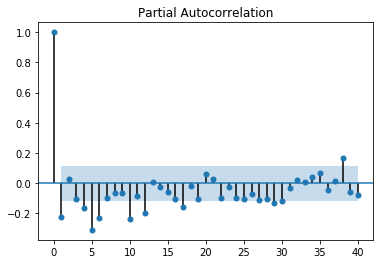

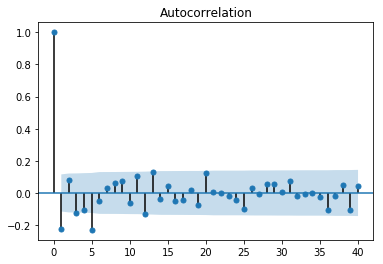

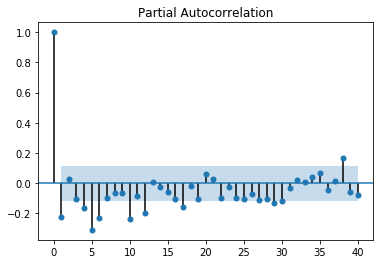

In [563]:
splt.plot_acf(decomp.resid[6:-6], lags = 40)
splt.plot_pacf(decomp.resid[6:-6], lags = 40)

In [564]:
!pip install pyramid-arima

### Apply ARIMA Model

In [565]:
nr.seed(4477)
import statsmodels.tsa.arima_process as arima
def ARMA_model(ar_coef, ma_coef, start = '1-2005', end = '1-2015'):
    dates = pd.date_range(start = start, end = end, freq = 'M')
    ts = arima.ArmaProcess(ar_coef, ma_coef)
    print('Is the time series stationary? ' + str(ts.isstationary))
    print('Is the time series invertible? ' + str(ts.isinvertible))
    return(pd.Series(ts.generate_sample(120), index = dates))
ts_series_ar2 = ARMA_model(ar_coef = [1, .75, .25], ma_coef = [1])

Is the time series stationary? True
Is the time series invertible? True


In [566]:
def model_ARIMA(ts1, order):
    from statsmodels.tsa.arima_model import ARIMA
    model = ARIMA(ts1, order = order)
    model_fit = model.fit(disp=0, method='mle', trend='nc')
    print(model_fit.summary())
    return(model_fit)
ar2_model = model_ARIMA(ts_series_ar2, order = (2,0,0))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(2, 0)   Log Likelihood                -152.786
Method:                           mle   S.D. of innovations              0.861
Date:                Tue, 26 Mar 2019   AIC                            311.573
Time:                        09:16:46   BIC                            319.935
Sample:                    01-31-2005   HQIC                           314.969
                         - 12-31-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.8407      0.080    -10.574      0.000      -0.997      -0.685
ar.L2.y       -0.4881      0.080     -6.136      0.000      -0.644      -0.332
                                    Roots           

In [567]:
arima_milk = model_ARIMA(decomp.resid[6:-6], order = (2,1,1))

                             ARIMA Model Results                              
Dep. Variable:                D.resid   No. Observations:                  287
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -373.414
Method:                           mle   S.D. of innovations              0.880
Date:                Tue, 26 Mar 2019   AIC                            754.829
Time:                        09:16:46   BIC                            769.467
Sample:                    08-31-1990   HQIC                           760.696
                         - 06-30-2014                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1.D.resid    -0.2132      0.059     -3.586      0.000      -0.330      -0.097
ar.L2.D.resid     0.0325      0.059      0.547      0.585      -0.084       0.149
ma.L1.D.resid    -1.0000      0.009   -1

In [568]:
def model_ARIMA_2(ts1, order):
    from statsmodels.tsa.arima_model import ARIMA
    from statsmodels.tsa.arima_model import ARIMAResults    
    model = ARIMA(ts1, order = order)
    model_fit = model.fit(disp=0, method='mle', trend='nc')
    BIC = ARIMAResults.bic(model_fit)
    print('Testing model of order: ' + str(order) + ' with BIC = ' + str(BIC))
    return(BIC, order, model_fit)

def step_ARIMA(resid, p_max, d_max, q_max):
    from statsmodels.tsa.arima_model import ARIMAResults    
    from statsmodels.tsa.arima_model import ARIMA
    best_BIC = 9999999999999999.0
    for p in range(p_max + 1):
        for d in range(d_max + 1):
            for q in range(q_max + 1):
                if(p > 0 or q > 0):
                    try:
                        order = (p, d, q)
                        BIC, order, model = model_ARIMA_2(resid, order)
                        if(BIC < best_BIC):
                            best_model = model
                            best_BIC = BIC
                            best_order = order
                    except: 
                        pass        
    return(best_BIC, best_order, best_model) 

BIC, order, model = step_ARIMA(decomp.resid[6:-6], 3, 3, 3)    
print('***************************************')
print('Best model with BIC = ' + str(BIC) + ' and with order '+ str(order))

Testing model of order: (0, 0, 1) with BIC = 754.496897534617
Testing model of order: (0, 0, 2) with BIC = 726.2588792337058
Testing model of order: (0, 0, 3) with BIC = 700.7728592031007
Testing model of order: (0, 1, 1) with BIC = 772.6435774311784
Testing model of order: (0, 2, 1) with BIC = 1025.216553452438
Testing model of order: (1, 0, 0) with BIC = 753.9714536012639
Testing model of order: (1, 0, 1) with BIC = 700.8873509112027
Testing model of order: (1, 0, 2) with BIC = 706.5126760292595
Testing model of order: (1, 0, 3) with BIC = 701.4714989282896
Testing model of order: (1, 1, 0) with BIC = 881.0421615891771
Testing model of order: (1, 1, 1) with BIC = 764.1065413756575
Testing model of order: (1, 2, 0) with BIC = 1113.0561069412256
Testing model of order: (1, 2, 3) with BIC = 785.337568243036
Testing model of order: (2, 0, 0) with BIC = 759.3972307506161
Testing model of order: (2, 0, 1) with BIC = 706.4727408120443
Testing model of order: (2, 0, 2) with BIC = 709.6951808

In [569]:
from pyramid.arima import auto_arima
stepwise_fit = auto_arima(decomp.resid[6:-6], start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise
stepwise_fit.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=779.856, BIC=797.940, Fit time=0.988 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1215.841, BIC=1223.074, Fit time=0.022 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=975.541, BIC=990.008, Fit time=0.201 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=791.431, BIC=805.898, Fit time=0.907 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=781.292, BIC=802.992, Fit time=1.368 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=936.715, BIC=951.182, Fit time=0.435 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=781.213, BIC=802.914, Fit time=1.896 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=783.772, BIC=809.089, Fit time=2.082 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=781.630, BIC=803.331, Fit time=1.100 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  288
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -384.928
Date:                            Tue, 26 Mar 2019   AIC                            779.856
Time:                                    09:17:00   BIC                            797.940
Sample:                                         0   HQIC                           787.114
                                            - 288                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.996e-07      0.000      0.002      0.998      -0.000       0.000
ar.L1         -0.2212      0.064     -3.438      0.001      -0.347      -0.095
ma.L1         -1.0000    283.326     -0.004      0.997    -556.310     554.310
ma.S.L12      -0.9813      0.234     -4.197      0.000      -1.439      -0.523
sigma2         0.8228    233.135      0.004      0.997    -456.113     457.759
===================================================================================
Ljung-Box (Q):                       84.05   Jarque-Bera (JB):                 0.11
Prob(Q):                              0.00   Prob(JB):                         0.95
Heteroskedasticity (H):               1.22   Skew:                            -0.00
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Forecast

In [571]:
#replace month str with floats
ts.replace(regex={'Jan': 1,
                  'Feb': 2,
                  'Mar': 3, 
                  'Apr': 4,
                  'May': 5,
                  'Jun': 6,
                  'Jul': 7,
                  'Aug': 8,
                  'Sep': 9,
                  'Oct': 10,
                  'Nov': 11,
                  'Dec': 12}, inplace=True)

In [572]:
import sklearn.linear_model as lm
X = ts.loc[:'12-31-2013', ['MonthCount', 'monthNumSqred', 'Month']].as_matrix()
Y = ts.loc[:'12-31-2013', 'Milk_log'].as_matrix()
lm_mod = lm.LinearRegression(fit_intercept = False)
mod_fit = lm_mod.fit(X, Y)

## and the predictions and the residual
ts.loc[:'12-31-2013', 'scores'] = mod_fit.predict(X)
ts.loc[:'12-31-2013', 'resids'] = ts.loc[:'1995-01-31', 'scores'] - ts.loc[:'1995-01-31', 'Milk_log']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


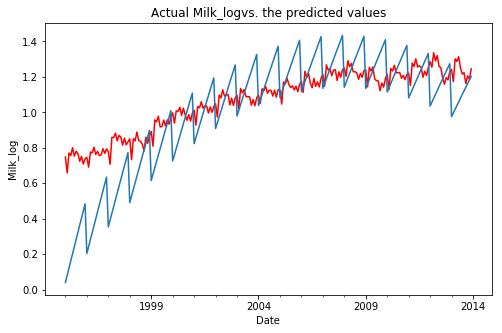

In [573]:
def plot_mod_fit(df, col):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8, 5)) # set plot area
    ax = fig.gca() # define axis  
    df.loc[:, col].plot(color = 'r', ax = ax)
    df.loc[:, 'scores'].plot(ax = ax) 
    ax.set_title('Actual ' + col + 'vs. the predicted values') # Give the plot a main title
    ax.set_xlabel('Date') # Set text for the x axis
    ax.set_ylabel(col)# Set text for y axis
plot_mod_fit(ts, 'Milk_log')

In [574]:
def RMSE(ts, score):
    from math import sqrt
    return sqrt(np.std(ts - score))

## Make the forecast for the next year
X = ts.loc['12-31-2013':, ['MonthCount', 'monthNumSqred', 'Month']].as_matrix()
RMSE(ts.loc['12-31-2013':, 'Milk_log'].as_matrix(), mod_fit.predict(X))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


0.0

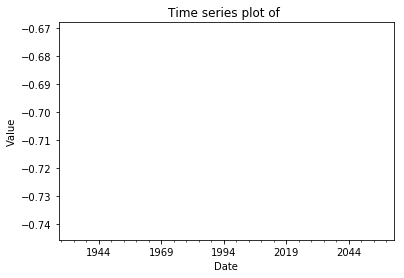

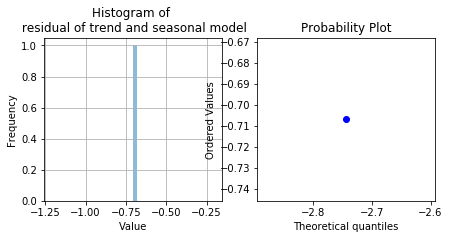

In [575]:
plot_ts(ts.loc[:'12-31-2013', 'resids'])
dist_ts(ts.loc[:'12-31-2013', 'resids'], '\n residual of trend and seasonal model')

### Questions

##### Q1. Is this time series stationary? 
##### A: No

##### Q2. Is there a significant seasonal component?
##### A: Yes

##### Q3. For the residual from the STL decomposition of the time series what is the order of the ARMA(p,q) process that best fits?
##### A: ? 